<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/2.%20Machine%20Learning/Semana%203%20-%20Classification%20Models/Semana_3_Ejercicio_Metricas_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix,plot_roc_curve


**Tarea**

Utilizaremos [este conjunto de datos](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv). Los datos, que se modificaron de este recurso, tienen información sobre las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna objetivo se llama “y_yes” en este CSV).

 La tarea es crear un modelo de regresión logística para predecir si el cliente se suscribirá o no. Afinen los hiperparámetros para obtener el mejor modelo posible. Luego, calculen la siguiente métrica de clasificación:

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv")
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [3]:
X = df.drop(columns="y_yes")
y = df["y_yes"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.3, stratify= y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
params = {"penalty":["l1","l2"],
          "C":[0.0001,.001,.01,.1,1,10],
          "class_weight":[None,"balanced"]}

In [14]:
log_reg = LogisticRegression(solver="liblinear")

gs = GridSearchCV(log_reg, params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [15]:
gs.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

**Accuracy**

In [19]:
print("Training accuracy:", gs.score(X_train, y_train))
print("Test accuracy:", gs.score(X_test, y_test))

Training accuracy: 0.8925410872313527
Test accuracy: 0.8887251289609432


In [20]:
preds = gs.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


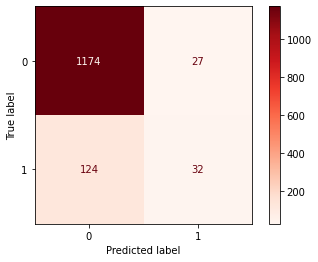

In [25]:
plot_confusion_matrix(gs, X_test, y_test, cmap="Reds", values_format ="d")

**Sensitivity**

In [43]:
sensitivity = tp / (tp+fn)
print("Sensitivity:",sensitivity )

Sensitivity: 0.20512820512820512


**Specificity**

In [33]:
specificity = tn / (tn+fp)
print("Specificity:", specificity)

Specificity: 0.97751873438801


In [44]:
#AUC ROC
roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])

0.8448728623582911

# PLOT ROC CURVE



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


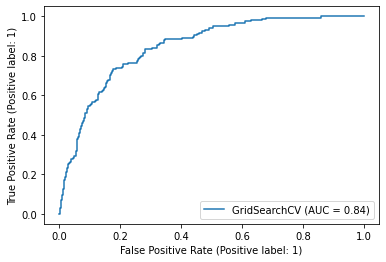

In [45]:
plot_roc_curve(gs, X_test, y_test);

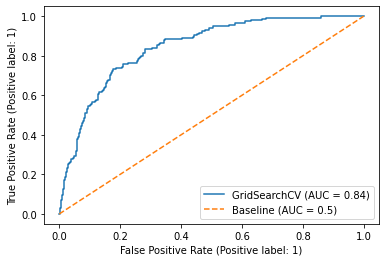

In [40]:
RocCurveDisplay.from_estimator(gs, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [42]:
df["y_yes"].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

Preguntas para pensar y responder
Después de terminar la tarea, respondan las siguientes preguntas:

* ¿Qué métrica va a ser la mejor para evaluar el modelo de clasificación para este conjunto de datos y por qué? Pista: piensen en lo que cada métrica significa en este caso específico. ¿Cuál métrica ayudará más al banco?
** En este caso ayudara mas la Sensivilidad, ya que esta esta orientada a los tp o personas que realmente realizaran subscripcion al banco.
** Accuracy por otro lado, no es certera ya que en los datos de entrenamiento, el 88% de clientes No se vinculara al banco. esto puede llevar a una precision muy alta solo indicando que el cliente no se vinculara.


* Comparen la exactitud del modelo con el modelo de referencia. ¿Ven algún problema?

** En el modelo de referencia el 88% de clientes no se vincula al banco mientras que en la prediccion acerta un 88%, esto puede indicar que de 100, incluso prediciendo que nadie se vincula al banco la prediccion sera del 88%.

* ¿De qué otras formas se puede mejorar este modelo?

** El problema principal es que la clase a predecir esta muy desbalanceada, por lo que se podrian aplicar distintas tecnicas orientadas a esta problematica para poder generar una mejor prediccion.
